In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yfin
import edhec_risk_kit_206 as erk 
import FactorModelLibForMOOC as fm 


%load_ext autoreload
%autoreload 2

In [2]:
tickers = ['kweb', 't', 'igm', 'spy', 'intc', 'aapl', 'xom', 'wfc']


dataframe = yfin.download(tickers, period = '20y')['Adj Close']
returns = dataframe.pct_change().dropna()
mreturns = returns.resample('M').apply(erk.compound).to_period('M')

mreturns 


[*********************100%%**********************]  8 of 8 completed


,AAPL,IGM,INTC,KWEB,SPY,T,WFC,XOM
Date,,,,,,,,
2013-08,0.073918,-0.023289,-0.043316,0.016362,-0.041075,-0.052912,-0.065480,-0.053570
2013-09,-0.021489,0.041974,0.042766,0.142269,0.031646,-0.000296,0.005842,-0.012850
2013-10,0.096381,0.040607,0.067627,-0.015733,0.046307,0.089464,0.033156,0.041609
2013-11,0.070054,0.036613,-0.016626,0.041958,0.029638,-0.027348,0.038462,0.050168
2013-12,0.008901,0.043197,0.088926,0.069567,0.025926,-0.001420,0.031349,0.082585
...,...,...,...,...,...,...,...,...
2024-03,-0.051286,0.023499,0.026016,0.035095,0.032702,0.039575,0.042634,0.112132
2024-04,-0.006706,-0.051520,-0.310165,0.061714,-0.040320,-0.024622,0.023464,0.017464
2024-05,0.130222,0.069122,0.016584,0.047722,0.050580,0.078745,0.015922,-0.000487


In [14]:
ewr = erk.backtest_ws(mreturns, estimation_window=48, weighting=erk.weight_ew)
#cwr = erk.backtest_ws(returns, estimation_window=48, weighting=erk.weight_cw, cap_weights=ind_mcap)
mv_sr = erk.backtest_ws(mreturns, estimation_window = 48, weighting= erk.weight_gmv, cov= erk.sample_cov)
mv_cc_r = erk.backtest_ws(mreturns, estimation_window=48, weighting=erk.weight_gmv, cov_estimator=erk.cc_cov)
mv_sh_r = erk.backtest_ws(mreturns, estimation_window=48, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.5)
msr = erk.msr_window_annrets(mreturns, estimation_window=48)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.117439,0.183105,-0.425497,3.252723,0.081645,0.110574,0.464564,-0.227785
GMV-Sample,0.088269,0.167908,-0.235355,3.539266,0.073663,0.098509,0.337555,-0.276860
GMV-CC,0.131974,0.172460,-0.378579,3.281999,0.074697,0.097633,0.575314,-0.237229
GMV-Shrink 0.5,0.112828,0.169415,-0.339278,3.386220,0.074032,0.098220,0.475651,-0.242918
MSR,0.178332,0.229314,0.088609,2.835638,0.090884,0.107108,0.629347,-0.286493


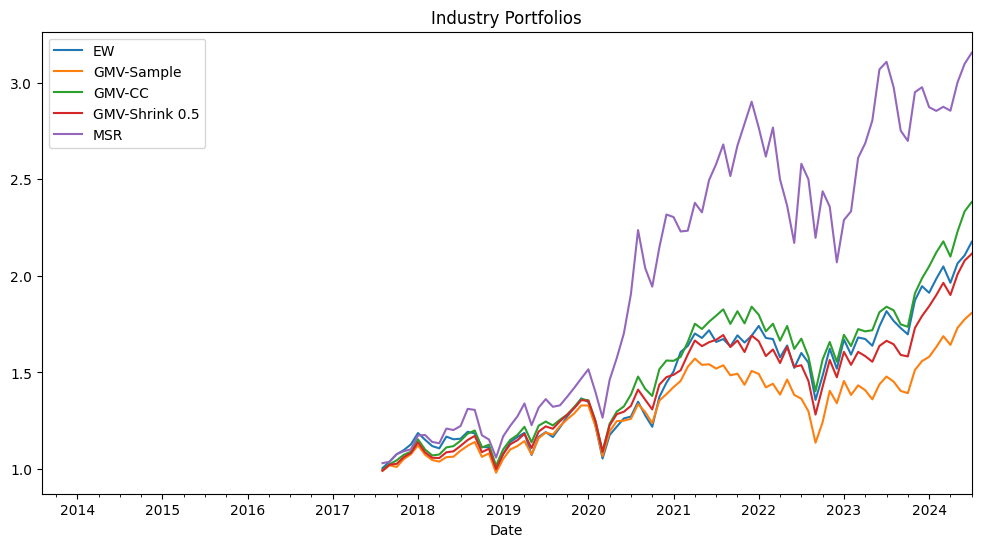

In [15]:
btr = pd.DataFrame({"EW": ewr, "GMV-Sample": mv_sr, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.5': mv_sh_r, "MSR" : msr[0]})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

In [42]:
cov = erk.cc_cov(r=mreturns)
gmv_cc_weights = erk.weight_gmv(mreturns, cov_estimator= erk.cc_cov)
gmv_cc_weights

array([0.04914908, 0.22648733, 0.        , 0.        , 0.52665834,
       0.18780523, 0.00990001, 0.        ])